## Spotify Data Set Analysis 
##### by Satyajit Gade

### **Problem Statement:** 
##### "What audio characteristics are most commonly associated with popular songs on Spotify?"

### **Project Description:**
This project aims to explore a dataset of Spotify tracks to identify trends and patterns in audio features that may influence a song’s popularity. By performing exploratory data analysis (EDA), I seek to uncover how attributes such as danceability, energy, tempo, loudness, valence, and others vary between popular and less popular songs. The goal is to gain data-driven insights into what makes a track successful in terms of listener engagement.

### **Defining Popularity:**
##### Let popularity > 80 be considered as a <ins>popular song</ins> and popularity ≤ 80 be considered as an <ins>unpopular song</ins>.

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting Data

In [2]:
# extract the zip files provided by Kaggle for the Spotify Dataset.
with zipfile.ZipFile("C:\\Users\\satya\\spotify-dataset-19212020-600k-tracks.zip", 'r') as z:
    z.extractall("spotify_data")

In [3]:
# read the csv files
tracks_df = pd.read_csv(r"spotify_data\tracks.csv") 
artists_df = pd.read_csv(r"spotify_data\artists.csv")

In [4]:
print(tracks_df.head())  # Displays first 5 rows with all columns

                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechine

In [5]:

print(artists_df.head())  # Displays first 5 rows with all columns

                       id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0  


In [6]:
tracks_df.info() # quick summary of data frame
tracks_df.isnull().sum() # checks for missing values or NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

### Data Managing and Cleaning

In [7]:
# Initial cleanup

# Converts the values in the popularity column to numeric values
# if it's any value that can't be converted to a number, it is treated as NaN.
tracks_df['popularity'] = pd.to_numeric(tracks_df['popularity'], errors='coerce')

# Removes rows where the popularity value is NaN (from above) 
tracks_df = tracks_df.dropna(subset=['popularity'])

In [8]:
# Data Cleaning
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], errors='coerce')
tracks_df['year'] = tracks_df['release_date'].dt.year

### Data Analysis

In [9]:
# Define songs that are really popular to have pop > 80
# Split into popular and unpopular songs
popular = tracks_df[tracks_df['popularity'] > 80] 
unpopular = tracks_df[tracks_df['popularity'] <= 80] 
# Song features
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'loudness']

##### Comparing Means for Popular vs Unpopular Songs

<Figure size 1000x600 with 0 Axes>

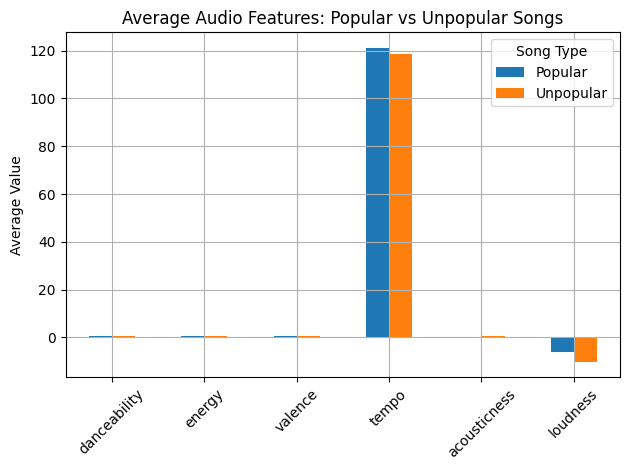

In [10]:
pop_means = popular[features].mean()
unpop_means = unpopular[features].mean()
compare_df = pd.DataFrame({'Popular': pop_means, 'Unpopular': unpop_means})

plt.figure(figsize=(10, 6))
compare_df.plot(kind='bar')
plt.title('Average Audio Features: Popular vs Unpopular Songs')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Song Type')
plt.savefig("images/means_pop_vs_unpop.jpg", dpi=300)
plt.show()

#### 1. Comparing Danceability

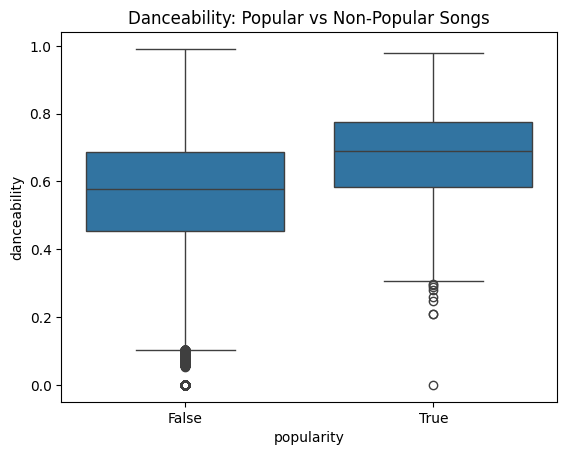

In [11]:
sns.boxplot(x=tracks_df['popularity'] > 80, y=tracks_df['danceability'], data=tracks_df) 
plt.title('Danceability: Popular vs Non-Popular Songs')
plt.savefig("images/danceability_box.jpg", dpi=300)

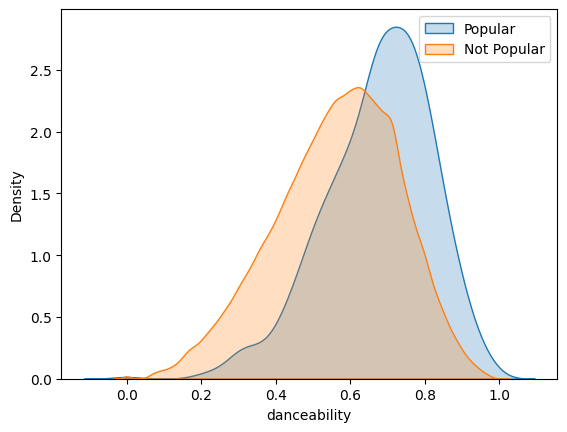

In [12]:
sns.kdeplot(tracks_df[tracks_df['popularity'] > 80]['danceability'], label='Popular', fill=True) 
sns.kdeplot(tracks_df[tracks_df['popularity'] <= 80]['danceability'], label='Not Popular', fill=True) 
plt.legend()
plt.savefig("images/danceability_density.jpg", dpi=300)

#### 2. Comparing Energy

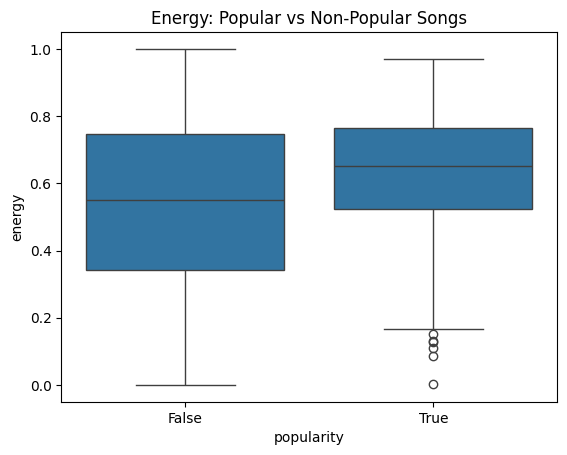

In [13]:
sns.boxplot(x=tracks_df['popularity'] > 80, y=tracks_df['energy'], data=tracks_df) 
plt.title('Energy: Popular vs Non-Popular Songs')
plt.savefig("images/energy_box.jpg", dpi=300)

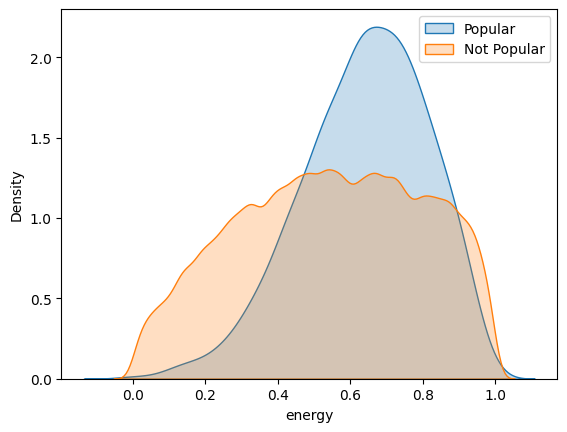

In [14]:
sns.kdeplot(tracks_df[tracks_df['popularity'] > 80]['energy'], label='Popular', fill=True) 
sns.kdeplot(tracks_df[tracks_df['popularity'] <= 80]['energy'], label='Not Popular', fill=True) 
plt.legend()
plt.savefig("images/energy_density.jpg", dpi=300)

#### 3. Comparing Valence (emotional positivity or negativity)

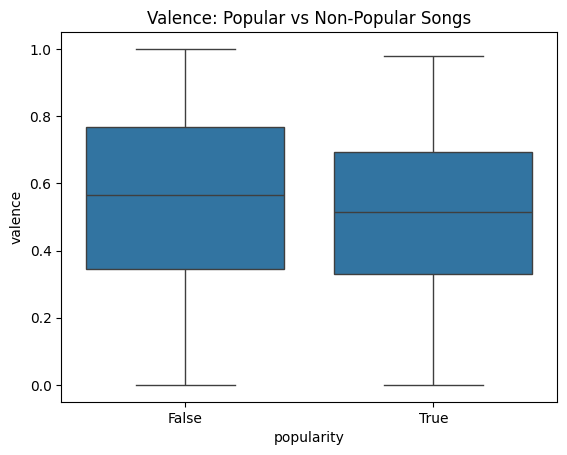

In [15]:
sns.boxplot(x=tracks_df['popularity'] > 80, y=tracks_df['valence'], data=tracks_df) 
plt.title('Valence: Popular vs Non-Popular Songs')
plt.savefig("images/valence_box.jpg", dpi=300)

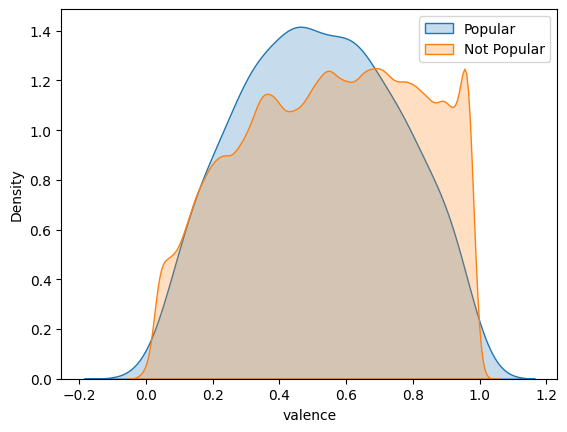

In [16]:
sns.kdeplot(tracks_df[tracks_df['popularity'] > 80]['valence'], label='Popular', fill=True) 
sns.kdeplot(tracks_df[tracks_df['popularity'] <= 80]['valence'], label='Not Popular', fill=True) 
plt.legend()
plt.savefig("images/valence_density.jpg", dpi=300)

#### 4. Comparing Tempo 

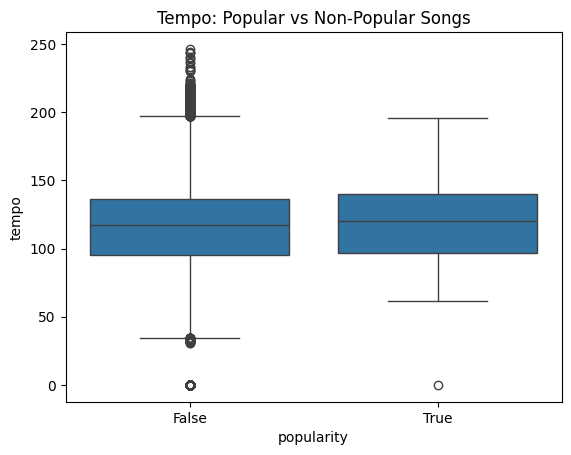

In [17]:
# Comparing Tempo
sns.boxplot(x=tracks_df['popularity'] > 80, y=tracks_df['tempo'], data=tracks_df) 
plt.title('Tempo: Popular vs Non-Popular Songs')
plt.savefig("images/tempo_box.jpg", dpi=300)

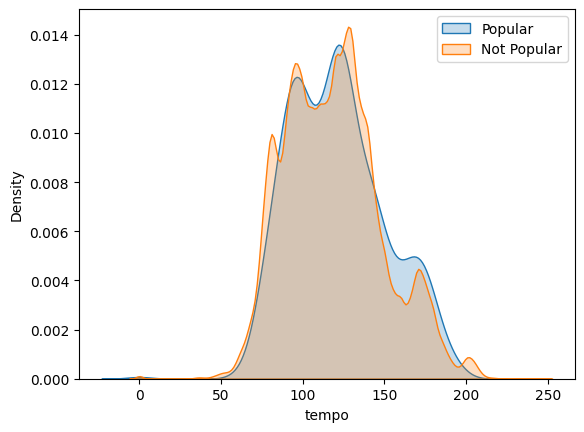

In [18]:
sns.kdeplot(tracks_df[tracks_df['popularity'] > 80]['tempo'], label='Popular', fill=True) 
sns.kdeplot(tracks_df[tracks_df['popularity'] <= 80]['tempo'], label='Not Popular', fill=True) 
plt.legend()
plt.savefig("images/tempo_density.jpg", dpi=300)

#### 5. Comparing Acousticness

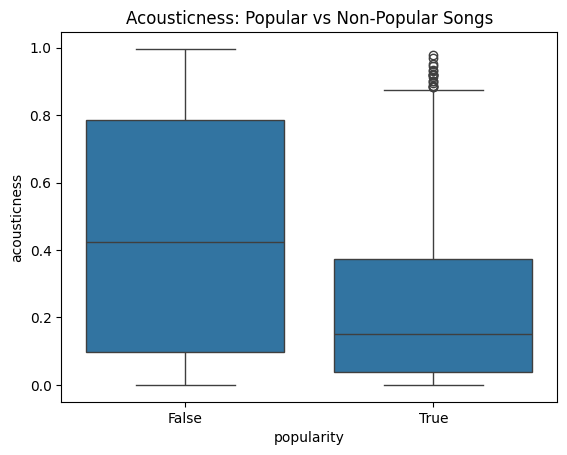

In [19]:
sns.boxplot(x=tracks_df['popularity'] > 80, y=tracks_df['acousticness'], data=tracks_df) 
plt.title('Acousticness: Popular vs Non-Popular Songs')
plt.savefig("images/acousticness_box.jpg", dpi=300)

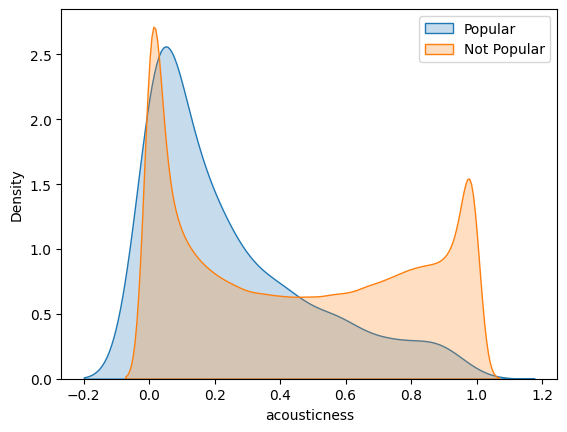

In [20]:
sns.kdeplot(tracks_df[tracks_df['popularity'] > 80]['acousticness'], label='Popular', fill=True) 
sns.kdeplot(tracks_df[tracks_df['popularity'] <= 80]['acousticness'], label='Not Popular', fill=True) 
plt.legend()
plt.savefig("images/acousticness_density.jpg", dpi=300)

#### 6. Comparing Loudness

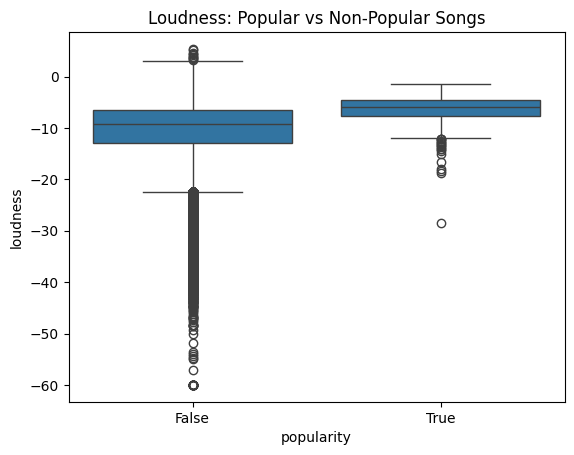

In [21]:
sns.boxplot(x=tracks_df['popularity'] > 80, y=tracks_df['loudness'], data=tracks_df) 
plt.title('Loudness: Popular vs Non-Popular Songs')
plt.savefig("images/loudness_box.jpg", dpi=300)

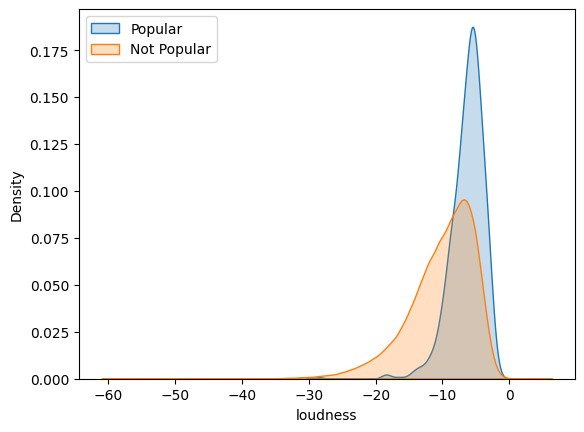

In [22]:
sns.kdeplot(tracks_df[tracks_df['popularity'] > 80]['loudness'], label='Popular', fill=True) 
sns.kdeplot(tracks_df[tracks_df['popularity'] <= 80]['loudness'], label='Not Popular', fill=True) 
plt.legend()
plt.savefig("images/loudness_density.jpg", dpi=300)

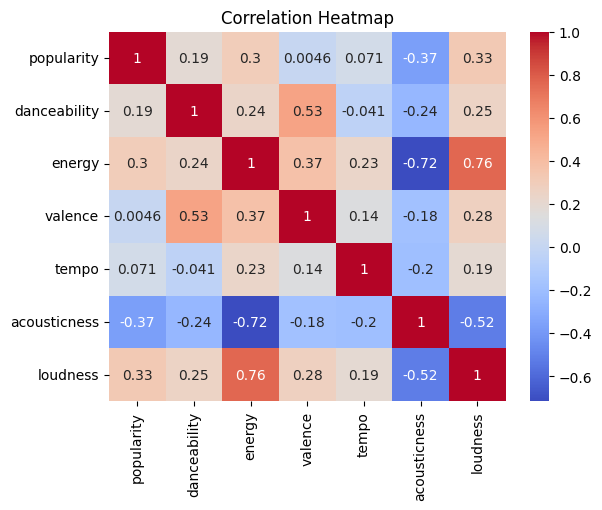

In [23]:
corr = tracks_df[['popularity', 'danceability', 'energy', 'valence', 'tempo',
           'acousticness', 'loudness']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.jpg", dpi=300)

### Plotting Trends Over Time.

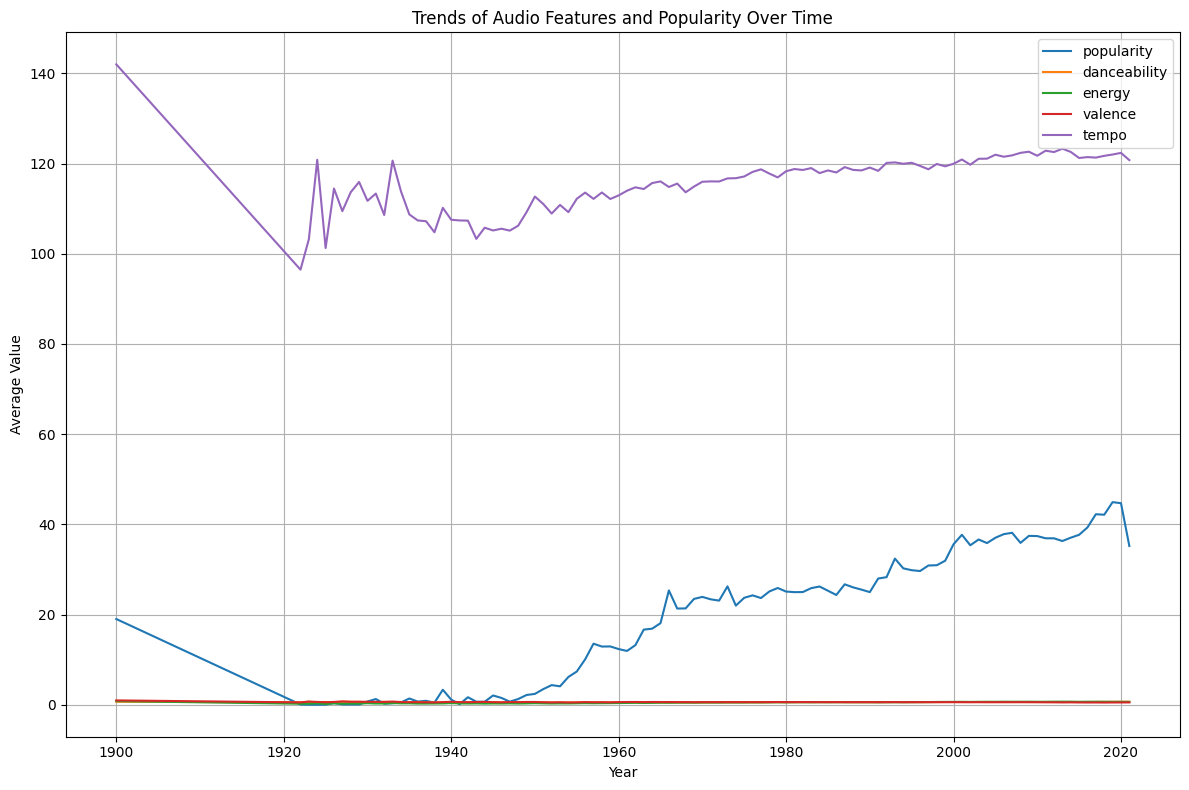

In [24]:
# Group by year and calculate the mean popularity and other features
trend_data = tracks_df.groupby('year')[['popularity', 'danceability', 'energy', 'valence', 'tempo']].mean().dropna()

# Plotting the trends over time
plt.figure(figsize=(12, 8))
for column in trend_data.columns:
    plt.plot(trend_data.index, trend_data[column], label=column)

plt.title('Trends of Audio Features and Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/trends_over_time.jpg", dpi=300)
plt.show()